# Clustering analysis
But this clustering result is never presented.

## Materials:
- 13 subjects (3 missing at least one timepoint)
- First two timepoints (t1 and t2) subject to analysis
- Manual segmentation performed on the series of the highest resolution
- Extracted radiomic features within the delineated tumor using PyRadiomics
- Some clustering

### PyRadiomics features:
- First Order Statistics (19 features)
- Shape-based (16 features)
- Gray Level Cooccurence Matrix (23 features)
- Gray Level Run Length Matrix (16 features)
- Gray Level Size Zone Matrix (16 features)
- Neigbouring Gray Tone Difference Matrix (5 features)
- Gray Level Dependence Matrix (14 features)

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import sys,os
from glob import glob

In [2]:
df=pd.read_csv('ctDNA_pyradiomics_v1.3.0_output_20180720.csv', index_col=0)
df_master=pd.read_csv('Initial_Cohort_20180130.csv', index_col=0)

In [20]:
df.head()

,PID,StudyDate,Timepoint,Image,Mask,general_info_BoundingBox,general_info_EnabledImageTypes,general_info_GeneralSettings,general_info_ImageHash,general_info_ImageSpacing,...,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_SmallAreaEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_ZoneEntropy,original_glszm_SmallAreaLowGrayLevelEmphasis,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Strength,original_ngtdm_Busyness,original_ngtdm_Contrast
Index,,,,,,,,,,,,,,,,,,,,,
9-20160920,9,20160920.0,T1,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(169, 196, 196, 63, 65, 33)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",6fbf43a39a55226680826fc7cba6e6e74bbb8b29,"(0.7109375, 0.7109375, 1.0)",...,1520.842205,0.716856,0.003770,6.484645,0.002586,0.000303,0.174422,0.974091,0.895226,0.000003
9-20170227,9,20170227.0,T2,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(146, 225, 230, 49, 54, 31)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",965407bab755b5b389f8228cdd47436fdf8c41f5,"(0.765625, 0.765625, 1.0)",...,1557.046331,0.727541,0.002243,6.143951,0.001773,0.000440,0.198344,1.485758,0.659196,0.000002
43-20160225,43,20160225.0,T1,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(129, 296, 184, 54, 45, 21)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",8482b3ac0837aa1ef81d050b7e3b65bf4d57ce00,"(0.6953125, 0.6953125, 1.0)",...,848.512911,0.685343,0.002099,6.260697,0.001697,0.000919,0.371566,2.550044,0.390971,0.000002
43-20160705,43,20160705.0,T2,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(116, 245, 154, 38, 47, 16)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",0344afdcd457b9e0e1d841424f7cdfcd5d2652c8,"(0.58984375, 0.58984375, 1.0)",...,1904.005432,0.747635,0.001298,6.484370,0.001152,0.000966,2.117633,3.436776,0.199281,0.000011
83-20160728,83,20160728.0,T1,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(136, 277, 205, 50, 45, 23)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",93263ccf70e5d02addd1eb94a64c1a0544bc300a,"(0.6640625, 0.6640625, 1.0)",...,1480.871510,0.687982,0.001176,6.004472,0.000961,0.000544,0.192744,1.067521,0.674749,0.000002


In [4]:
df_master.head()

,MRN,Mutation,RECIST
Patient Number,,,
162,1003159262,EGFR T790M,Progressive Disease
83,1004680564,EGFR T790M,Progressive Disease
203,1002830910,EGFR T790M,Progressive Disease
166,1002638882,EGFR T790M,Progressive Disease
43,1002641492,EGFR T790M,Stable Disease


In [5]:
df_master['ResponseGroup']=df_master.RECIST
df_master['ResponseGroup'].replace(to_replace=['Stable Disease', 'Partial Response', 'Progressive Disease'],
                                   value=['Responders', 'Responders', 'Non-Responders'], inplace=True)

In [6]:
df_master.head()

,MRN,Mutation,RECIST,ResponseGroup
Patient Number,,,,
162,1003159262,EGFR T790M,Progressive Disease,Non-Responders
83,1004680564,EGFR T790M,Progressive Disease,Non-Responders
203,1002830910,EGFR T790M,Progressive Disease,Non-Responders
166,1002638882,EGFR T790M,Progressive Disease,Non-Responders
43,1002641492,EGFR T790M,Stable Disease,Responders


In [7]:
df_merged=pd.merge(df, df_master[['Mutation', 'RECIST', 'ResponseGroup']], left_on='PID', right_index=True)

In [21]:
df_merged.head()

,PID,StudyDate,Timepoint,Image,Mask,general_info_BoundingBox,general_info_EnabledImageTypes,general_info_GeneralSettings,general_info_ImageHash,general_info_ImageSpacing,...,original_glszm_ZoneEntropy,original_glszm_SmallAreaLowGrayLevelEmphasis,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Strength,original_ngtdm_Busyness,original_ngtdm_Contrast,Mutation,RECIST,ResponseGroup
Index,,,,,,,,,,,,,,,,,,,,,
9-20160920,9,20160920.0,T1,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(169, 196, 196, 63, 65, 33)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",6fbf43a39a55226680826fc7cba6e6e74bbb8b29,"(0.7109375, 0.7109375, 1.0)",...,6.484645,0.002586,0.000303,0.174422,0.974091,0.895226,0.000003,EGFR T790M,Partial Response,Responders
9-20170227,9,20170227.0,T2,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(146, 225, 230, 49, 54, 31)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",965407bab755b5b389f8228cdd47436fdf8c41f5,"(0.765625, 0.765625, 1.0)",...,6.143951,0.001773,0.000440,0.198344,1.485758,0.659196,0.000002,EGFR T790M,Partial Response,Responders
43-20160225,43,20160225.0,T1,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(129, 296, 184, 54, 45, 21)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",8482b3ac0837aa1ef81d050b7e3b65bf4d57ce00,"(0.6953125, 0.6953125, 1.0)",...,6.260697,0.001697,0.000919,0.371566,2.550044,0.390971,0.000002,EGFR T790M,Stable Disease,Responders
43-20160705,43,20160705.0,T2,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(116, 245, 154, 38, 47, 16)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",0344afdcd457b9e0e1d841424f7cdfcd5d2652c8,"(0.58984375, 0.58984375, 1.0)",...,6.484370,0.001152,0.000966,2.117633,3.436776,0.199281,0.000011,EGFR T790M,Stable Disease,Responders
83-20160728,83,20160728.0,T1,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(136, 277, 205, 50, 45, 23)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",93263ccf70e5d02addd1eb94a64c1a0544bc300a,"(0.6640625, 0.6640625, 1.0)",...,6.004472,0.000961,0.000544,0.192744,1.067521,0.674749,0.000002,EGFR T790M,Progressive Disease,Non-Responders


In [9]:
df_merged.columns

Index([u'PID', u'StudyDate', u'Timepoint', u'Image', u'Mask',
       u'general_info_BoundingBox', u'general_info_EnabledImageTypes',
       u'general_info_GeneralSettings', u'general_info_ImageHash',
       u'general_info_ImageSpacing',
       ...
       u'original_glszm_ZoneEntropy',
       u'original_glszm_SmallAreaLowGrayLevelEmphasis',
       u'original_ngtdm_Coarseness', u'original_ngtdm_Complexity',
       u'original_ngtdm_Strength', u'original_ngtdm_Busyness',
       u'original_ngtdm_Contrast', u'Mutation', u'RECIST', u'ResponseGroup'],
      dtype='object', length=130)

In [10]:
cols_features=[i for i in df_merged.columns if 'original' in i]
#cols_features.append('general_info_VoxelNum')
cols_number=['f%d' % i for i in range(1,len(cols_features)+1)]
#cols_number.append()

In [22]:
valid_id=df_merged.dropna().index
df_merged_norm=df_merged.copy()
df_merged_norm.loc[valid_id, cols_features]=stats.zscore(df_merged_norm.loc[valid_id, cols_features])

In [23]:
df_merged_norm.groupby(['ResponseGroup', 'Timepoint']).describe()

PID                                               \
                         count        mean         std   min     25%    50%   
ResponseGroup  Timepoint                                                      
Non-Responders T1          4.0  153.500000   50.494224  83.0  142.25  164.0   
               T2          4.0  153.500000   50.494224  83.0  142.25  164.0   
Responders     T1          9.0  175.444444  109.495561   9.0  113.00  177.0   
               T2          9.0  175.444444  109.495561   9.0  113.00  177.0   

                                        StudyDate                  ...     \
                             75%    max     count          mean    ...      
ResponseGroup  Timepoint                                           ...      
Non-Responders T1         175.25  203.0       4.0  2.016062e+07    ...      
               T2         175.25  203.0       3.0  2.016084e+07    ...      
Responders     T1         248.00  349.0       9.0  2.016287e+07    ...      
               T2         248.00  349.0       9.0  2.016516e+07    ...      

                         original_shape_SurfaceVolumeRatio            \
                                                       75%       max   
ResponseGroup  Timepoint                                               
Non-Responders T1                                 0.274481  1.048388   
               T2                                 0.251813  0.712134   
Responders     T1                                -0.047516  0.647953   
               T2                                 0.349827  3.869716   

                         original_shape_Volume                                \
                                         count      mean       std       min   
ResponseGroup  Timepoint                                                       
Non-Responders T1                          4.0  0.205824  0.998615 -0.780450   
               T2                          2.0  1.160777  2.588774 -0.669763   
Responders     T1                          9.0  0.059190  1.005531 -0.698774   
               T2                          8.0 -0.459695  0.300349 -0.789816   

                                                                  
                               25%       50%       75%       max  
ResponseGroup  Timepoint                                          
Non-Responders T1        -0.515420  0.098102  0.819346  1.407541  
               T2         0.245507  1.160777  2.076047  2.991316  
Responders     T1        -0.524245 -0.460010 -0.040011  2.305354  
               T2        -0.638245 -0.613265 -0.243862  0.090369  

[4 rows x 936 columns]

In [24]:
df_merged_norm.head(10)

,PID,StudyDate,Timepoint,Image,Mask,general_info_BoundingBox,general_info_EnabledImageTypes,general_info_GeneralSettings,general_info_ImageHash,general_info_ImageSpacing,...,original_glszm_ZoneEntropy,original_glszm_SmallAreaLowGrayLevelEmphasis,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Strength,original_ngtdm_Busyness,original_ngtdm_Contrast,Mutation,RECIST,ResponseGroup
Index,,,,,,,,,,,,,,,,,,,,,
9-20160920,9,20160920.0,T1,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(169, 196, 196, 63, 65, 33)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",6fbf43a39a55226680826fc7cba6e6e74bbb8b29,"(0.7109375, 0.7109375, 1.0)",...,0.655044,-0.508591,-0.394958,-0.420470,-0.447750,-0.011347,-0.300852,EGFR T790M,Partial Response,Responders
9-20170227,9,20170227.0,T2,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(146, 225, 230, 49, 54, 31)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",965407bab755b5b389f8228cdd47436fdf8c41f5,"(0.765625, 0.765625, 1.0)",...,0.088926,-0.619662,-0.386864,-0.409167,-0.319375,-0.285988,-0.301241,EGFR T790M,Partial Response,Responders
43-20160225,43,20160225.0,T1,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(129, 296, 184, 54, 45, 21)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",8482b3ac0837aa1ef81d050b7e3b65bf4d57ce00,"(0.6953125, 0.6953125, 1.0)",...,0.282918,-0.630029,-0.358778,-0.327320,-0.052349,-0.598090,-0.301396,EGFR T790M,Stable Disease,Responders
43-20160705,43,20160705.0,T2,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(116, 245, 154, 38, 47, 16)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",0344afdcd457b9e0e1d841424f7cdfcd5d2652c8,"(0.58984375, 0.58984375, 1.0)",...,0.654586,-0.704578,-0.356025,0.497692,0.170130,-0.821138,-0.295368,EGFR T790M,Stable Disease,Responders
83-20160728,83,20160728.0,T1,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(136, 277, 205, 50, 45, 23)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",93263ccf70e5d02addd1eb94a64c1a0544bc300a,"(0.6640625, 0.6640625, 1.0)",...,-0.142841,-0.730686,-0.380811,-0.411813,-0.424309,-0.267890,-0.301389,EGFR T790M,Progressive Disease,Non-Responders
83-20161111,83,20161111.0,T2,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(138, 268, 206, 40, 35, 15)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",42f9887b37f87f27d1d660fcfb59271291348344,"(0.61328125, 0.61328125, 1.0)",...,-0.406194,-0.339124,-0.322278,-0.466717,-0.539831,0.107981,-0.299046,EGFR T790M,Progressive Disease,Non-Responders
113-20160804,113,20160804.0,T1,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(178, 174, 125, 47, 54, 35)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",366cf80d490f3989e83d1f16acaef73c3e4b5cbd,"(0.82421875, 0.82421875, 1.0)",...,1.446857,-0.151084,-0.382525,-0.324049,-0.525012,-0.055346,-0.279862,EGFR T790M,Partial Response,Responders
113-20161026,113,20161026.0,T2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EGFR T790M,Partial Response,Responders
150-20160629,150,20160629.0,T1,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(319, 296, 240, 27, 22, 9)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",de47f8b9bba46b3ee8cdeb01f1018b8e3977df42,"(0.9765625, 0.9765625, 3.0)",...,0.806340,-0.005377,-0.017589,0.069778,0.239163,-0.566785,-0.143178,EGFR T790M,Stable Disease,Responders


In [25]:
pd.crosstab(df_merged.ResponseGroup, df_merged.Timepoint)

Timepoint,T1,T2
ResponseGroup,,
Non-Responders,4,4
Responders,9,9


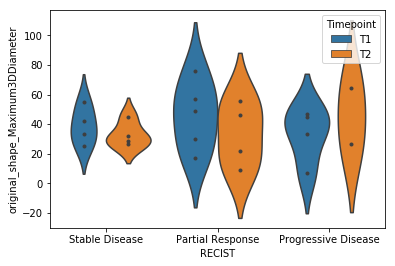

In [26]:
sns.violinplot(x='RECIST', y='original_shape_Maximum3DDiameter', hue='Timepoint', data=df_merged, 
               order=['Stable Disease', 'Partial Response', 'Progressive Disease'], hue_order=['T1', 'T2'],
               inner='point')
#sns.stripplot(x='RECIST', y='original_shape_Maximum3DDiameter', hue='Timepoint', data=df_merged, 
#              order=['Stable Disease', 'Partial Response', 'Progressive Disease'], hue_order=['T1', 'T2'],
#              jitter=0.1, dodge=True, color='black')

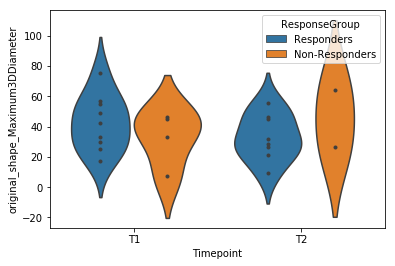

In [27]:
sns.violinplot(hue='ResponseGroup', y='original_shape_Maximum3DDiameter', x='Timepoint', data=df_merged, 
               order=['T1', 'T2'], inner='point', legend=False)
#sns.stripplot(x='RECIST', y='original_shape_Maximum3DDiameter', hue='Timepoint', data=df_merged, 
#              order=['Stable Disease', 'Partial Response', 'Progressive Disease'], hue_order=['T1', 'T2'],
#              jitter=0.1, dodge=True, color='black')

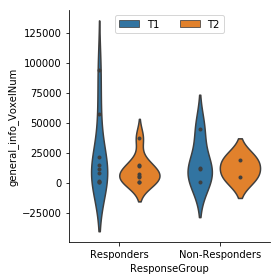

In [28]:
sns.factorplot(x='ResponseGroup', y='general_info_VoxelNum', hue='Timepoint', data=df_merged_norm, 
               hue_order=['T1', 'T2'], kind='violin', inner='point', legend=False)
plt.legend(loc='upper center', ncol=2)


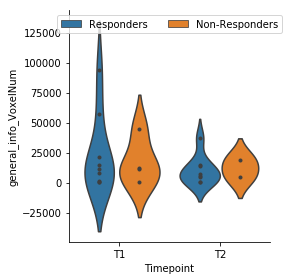

In [29]:
sns.factorplot(x='Timepoint', y='general_info_VoxelNum', hue='ResponseGroup',  data=df_merged_norm, 
               kind='violin', inner='point', legend=False)
plt.legend(loc='upper center', ncol=2)

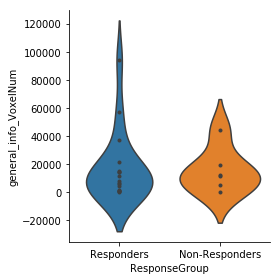

In [30]:
sns.factorplot(y='general_info_VoxelNum', x='ResponseGroup',  data=df_merged_norm, 
               kind='violin', inner='point', legend=False)
plt.legend(loc='upper center', ncol=2)

In [31]:
outdir=os.path.join('figures_20180720', 'violinplots_norm_byTime')
try:
    os.makedirs(outdir)
except:
    pass
for feature in cols_features:
    #print feature
    g=sns.factorplot(hue='ResponseGroup', y=feature, x='Timepoint', data=df_merged_norm, 
                     order=['T1', 'T2'], kind='violin', inner='point', legend=False)

    g.ax.set_title('%s: %s' % (feature.split('_')[1], feature.split('_')[2]))
    g.ax.set_ylabel('')
    plt.legend(loc='upper center', ncol=2)
    g.fig.savefig(os.path.join(outdir, 'violinplot_%s_%s_by_groups.png' % (feature.split('_')[1], feature.split('_')[2])),
                  dpi=150, bbox_inches='tight')
    plt.close('all')

In [35]:
valid_id.shape

(23L,)

In [102]:
baseline_valid_index=df_merged_norm.loc[valid_id].query('Timepoint == "T1"').index
followup_valid_index=df_merged_norm.loc[valid_id].query('Timepoint == "T2"').index

In [70]:
from collections import OrderedDict
d_feature_family=OrderedDict()
d_feature_family_name={}
for i in cols_features:
    a=i.split('_')[1]
    d_feature_family_name[i]=a
    if a not in d_feature_family:
        d_feature_family[a]=1
    else:
        d_feature_family[a]+=1

In [104]:
colors=sns.color_palette("colorblind", n_colors=7)

In [108]:
colors

[(0.0, 0.4470588235294118, 0.6980392156862745),
 (0.0, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.4745098039215686, 0.6549019607843137),
 (0.9411764705882353, 0.8941176470588236, 0.25882352941176473),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.0, 0.4470588235294118, 0.6980392156862745)]

In [123]:
groups=df_merged_norm['ResponseGroup'].unique().tolist() + df_merged_norm['RECIST'].unique().tolist()

In [124]:
groups

['Responders',
 'Non-Responders',
 'Partial Response',
 'Stable Disease',
 'Progressive Disease']

In [125]:
lut_cols={k: colors[i] for i, k in enumerate(groups)}

In [138]:
col_colors = df_merged_norm['ResponseGroup'].map(lut_cols).to_frame()
col_colors['RECIST'] = df_merged_norm['RECIST'].map(lut_cols)

In [139]:
col_colors

,ResponseGroup,RECIST
Index,,
9-20160920,"(0.0, 0.447058823529, 0.698039215686)","(0.835294117647, 0.36862745098, 0.0)"
9-20170227,"(0.0, 0.447058823529, 0.698039215686)","(0.835294117647, 0.36862745098, 0.0)"
43-20160225,"(0.0, 0.447058823529, 0.698039215686)","(0.8, 0.474509803922, 0.654901960784)"
43-20160705,"(0.0, 0.447058823529, 0.698039215686)","(0.8, 0.474509803922, 0.654901960784)"
83-20160728,"(0.0, 0.619607843137, 0.450980392157)","(0.941176470588, 0.894117647059, 0.258823529412)"
83-20161111,"(0.0, 0.619607843137, 0.450980392157)","(0.941176470588, 0.894117647059, 0.258823529412)"
113-20160804,"(0.0, 0.447058823529, 0.698039215686)","(0.835294117647, 0.36862745098, 0.0)"
113-20161026,"(0.0, 0.447058823529, 0.698039215686)","(0.835294117647, 0.36862745098, 0.0)"
150-20160629,"(0.0, 0.447058823529, 0.698039215686)","(0.8, 0.474509803922, 0.654901960784)"


In [109]:
lut_rows={k: colors[i] for i, k in enumerate(d_feature_family.keys())}

In [110]:
lut_rows

{'firstorder': (0.8, 0.4745098039215686, 0.6549019607843137),
 'glcm': (0.8352941176470589, 0.3686274509803922, 0.0),
 'gldm': (0.0, 0.6196078431372549, 0.45098039215686275),
 'glrlm': (0.9411764705882353, 0.8941176470588236, 0.25882352941176473),
 'glszm': (0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 'ngtdm': (0.0, 0.4470588235294118, 0.6980392156862745),
 'shape': (0.0, 0.4470588235294118, 0.6980392156862745)}

In [113]:
row_colors=pd.DataFrame.from_dict(d_feature_family_name, orient='index')[0].map(lut_rows)

In [116]:
baseline_valid_index, followup_valid_index

(Index([u'9-20160920', u'43-20160225', u'83-20160728', u'113-20160804',
        u'150-20160629', u'162-20160329', u'166-20160426', u'177-20160208',
        u'203-20161017', u'222-20161011', u'248-20161215', u'268-20170203',
        u'349-20170615'],
       dtype='object', name=u'Index'),
 Index([u'9-20170227', u'43-20160705', u'83-20161111', u'150-20161012',
        u'162-20160608', u'177-20160420', u'222-20161219', u'248-20170427',
        u'268-20170411', u'349-20171020'],
       dtype='object', name=u'Index'))

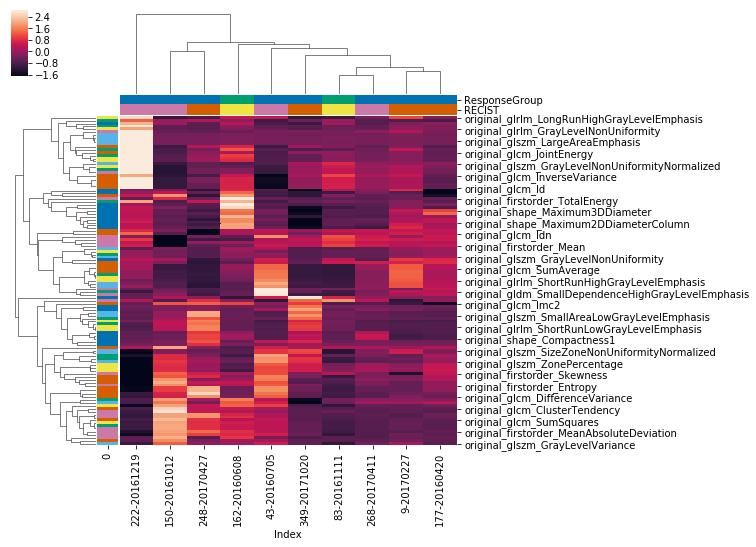

In [149]:
sns.clustermap(df_merged_norm.loc[followup_valid_index, cols_features].T, figsize=(8,8), 
               col_colors=col_colors, row_colors=row_colors, robust=True)

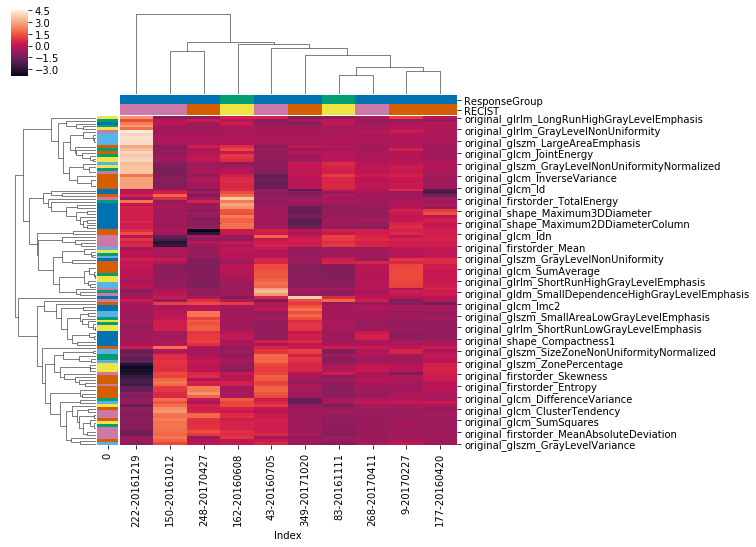

In [150]:
sns.clustermap(df_merged_norm.loc[followup_valid_index, cols_features].T, figsize=(8,8), 
               col_colors=col_colors, row_colors=row_colors)

In [157]:
outdir=os.path.join('figures_20180720', 'hierarchical_clustering')
try:
    os.makedirs(outdir)
except:
    pass

for i in ['single', 'average', 'complete', 'weighted', 'centroid', 'median', 'ward']:
    #print i
    g = sns.clustermap(df_merged_norm.loc[baseline_valid_index, cols_features].T, figsize=(8,8), 
                       col_colors=col_colors, row_colors=row_colors, method=i)
    g.fig.suptitle('ctDNA: hierarchical clustering w/ method %s' % (i.upper()), fontsize=18)
    g.savefig(os.path.join(outdir, 'clustering_method_%s_t1.png' % (i)), bbox_inches='tight')
    plt.close('all')

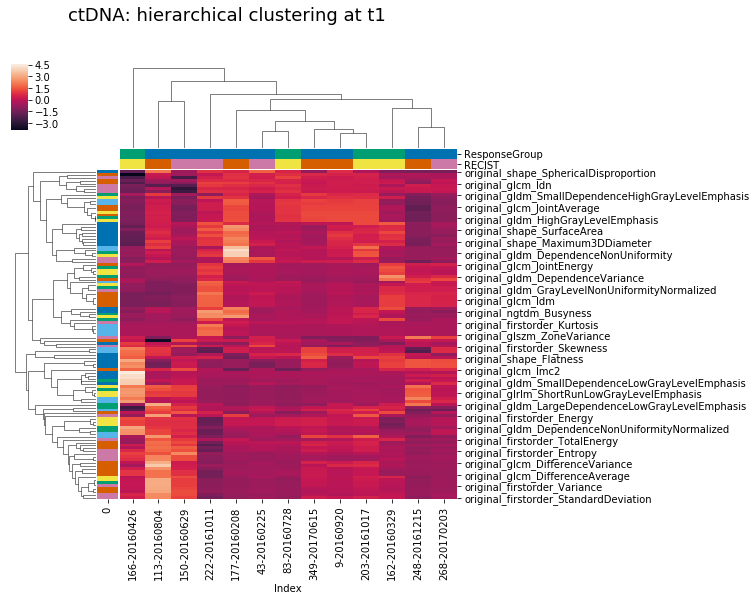

In [168]:
g=sns.clustermap(df_merged_norm.loc[baseline_valid_index, cols_features].T, figsize=(8,8), 
                 col_colors=col_colors, row_colors=row_colors, method='average', metric='cityblock')
g.fig.suptitle('ctDNA: hierarchical clustering at t1', fontsize=18)
g.savefig(os.path.join(outdir, 'clustering_t1_average_cityblock.png'), bbox_inches='tight')

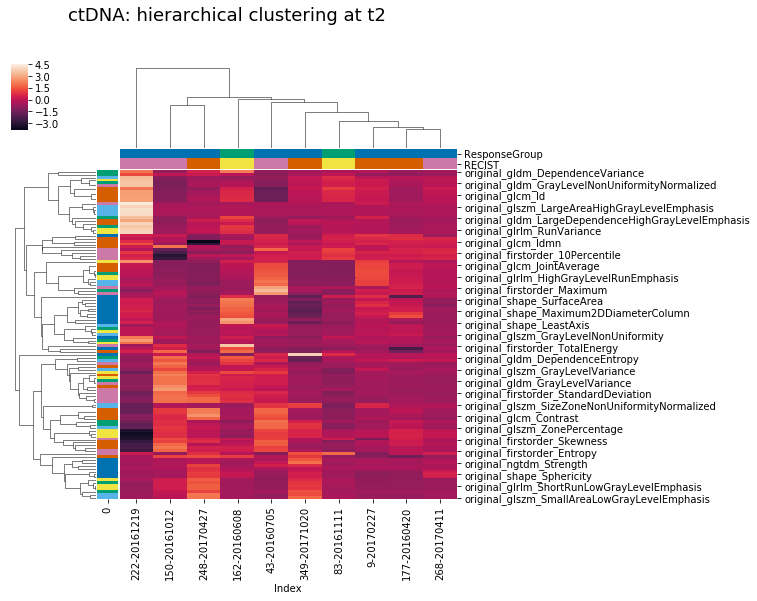

In [170]:
g=sns.clustermap(df_merged_norm.loc[followup_valid_index, cols_features].T, figsize=(8,8), 
                 col_colors=col_colors, row_colors=row_colors, method='average', metric='cityblock')
g.fig.suptitle('ctDNA: hierarchical clustering at t2', fontsize=18)
g.savefig(os.path.join(outdir, 'clustering_t2_average_cityblock.png'), bbox_inches='tight')

------------

In [43]:
outdir=os.path.join('figures_20180720', 'violinplots_norm')
try:
    os.makedirs(outdir)
except:
    pass
for feature in cols_features:
    #print feature
    g=sns.factorplot(x='ResponseGroup', y=feature, hue='Timepoint', data=df_merged_norm, 
               hue_order=['T1', 'T2'], kind='violin', inner='point', legend=False)

    g.ax.set_title('%s: %s' % (feature.split('_')[1], feature.split('_')[2]))
    g.ax.set_ylabel('')
    plt.legend(loc='upper center', ncol=2)
    g.fig.savefig(os.path.join(outdir, 'violinplot_%s_%s_by_groups.png' % (feature.split('_')[1], feature.split('_')[2])),
                  dpi=150, bbox_inches='tight')
    plt.close('all')

In [45]:
outdir=os.path.join('figures_20180622', 'violinplots_norm_noTime')
try:
    os.makedirs(outdir)
except:
    pass
for feature in cols_features:
    #print feature
    g=sns.factorplot(x='ResponseGroup', y=feature, data=df_merged_norm, 
                     kind='violin', inner='point', legend=False)

    g.ax.set_title('%s: %s' % (feature.split('_')[1], feature.split('_')[2]))
    g.ax.set_ylabel('')
    plt.legend(loc='upper center', ncol=2)
    g.fig.savefig(os.path.join(outdir, 'violinplot_%s_%s_by_groups.png' % (feature.split('_')[1], feature.split('_')[2])),
                  dpi=150, bbox_inches='tight')
    plt.close('all')

In [47]:
df_merged_norm.head(7)

,PID,StudyDate,Timepoint,Image,Mask,general_info_BoundingBox,general_info_EnabledImageTypes,general_info_GeneralSettings,general_info_ImageHash,general_info_ImageSpacing,...,original_glszm_ZoneEntropy,original_glszm_SmallAreaLowGrayLevelEmphasis,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Strength,original_ngtdm_Busyness,original_ngtdm_Contrast,Mutation,RECIST,ResponseGroup
Index,,,,,,,,,,,,,,,,,,,,,
9-20160920,9,20160920,T1,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(169, 196, 196, 63, 65, 33)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",6fbf43a39a55226680826fc7cba6e6e74bbb8b29,"(0.7109375, 0.7109375, 1.0)",...,0.723704,-0.527495,-0.415699,-0.447909,-0.482064,0.023839,-0.316051,EGFR T790M,Partial Response,Responders
9-20170227,9,20170227,T2,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(146, 225, 230, 49, 54, 31)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",965407bab755b5b389f8228cdd47436fdf8c41f5,"(0.765625, 0.765625, 1.0)",...,0.162086,-0.634487,-0.407908,-0.436999,-0.357741,-0.241134,-0.316424,EGFR T790M,Partial Response,Responders
43-20160225,43,20160225,T1,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(129, 296, 184, 54, 45, 21)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",8482b3ac0837aa1ef81d050b7e3b65bf4d57ce00,"(0.6953125, 0.6953125, 1.0)",...,0.354536,-0.644473,-0.380877,-0.358000,-0.099144,-0.542250,-0.316572,EGFR T790M,Stable Disease,Responders
43-20160705,43,20160705,T2,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(116, 245, 154, 38, 47, 16)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",0344afdcd457b9e0e1d841424f7cdfcd5d2652c8,"(0.58984375, 0.58984375, 1.0)",...,0.723250,-0.716284,-0.378227,0.438309,0.116311,-0.757445,-0.310788,EGFR T790M,Stable Disease,Responders
83-20160728,83,20160728,T1,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(136, 277, 205, 50, 45, 23)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",93263ccf70e5d02addd1eb94a64c1a0544bc300a,"(0.6640625, 0.6640625, 1.0)",...,-0.067839,-0.741433,-0.402082,-0.439553,-0.459363,-0.223674,-0.316566,EGFR T790M,Progressive Disease,Non-Responders
83-20161111,83,20161111,T2,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(138, 268, 206, 40, 35, 15)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",42f9887b37f87f27d1d660fcfb59271291348344,"(0.61328125, 0.61328125, 1.0)",...,-0.329099,-0.364253,-0.345746,-0.492547,-0.571238,0.138965,-0.314318,EGFR T790M,Progressive Disease,Non-Responders
113-20160804,113,20160804,T1,/cbica/comp_space/hsiehm/ctDNA/Pipelines/renam...,/cbica/comp_space/hsiehm/ctDNA/Pipelines/manua...,"(178, 174, 125, 47, 54, 35)",{'Original': {}},"{'distances': [1], 'additionalInfo': True, 'en...",366cf80d490f3989e83d1f16acaef73c3e4b5cbd,"(0.82421875, 0.82421875, 1.0)",...,1.509224,-0.183121,-0.403733,-0.354843,-0.556887,-0.018612,-0.295907,EGFR T790M,Partial Response,Responders


In [59]:
df.loc['83-20160728', cols_features].shape, len(cols_number), len(cols_features)

((114L,), 114, 114)

In [89]:
index

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113])

In [155]:
cols_features

['original_shape_Maximum3DDiameter',
 'original_shape_Compactness2',
 'original_shape_Maximum2DDiameterSlice',
 'original_shape_Sphericity',
 'original_shape_MinorAxis',
 'original_shape_Compactness1',
 'original_shape_Elongation',
 'original_shape_SurfaceVolumeRatio',
 'original_shape_Volume',
 'original_shape_SphericalDisproportion',
 'original_shape_MajorAxis',
 'original_shape_LeastAxis',
 'original_shape_Flatness',
 'original_shape_SurfaceArea',
 'original_shape_Maximum2DDiameterColumn',
 'original_shape_Maximum2DDiameterRow',
 'original_gldm_GrayLevelVariance',
 'original_gldm_HighGrayLevelEmphasis',
 'original_gldm_GrayLevelNonUniformityNormalized',
 'original_gldm_DependenceEntropy',
 'original_gldm_DependenceNonUniformity',
 'original_gldm_GrayLevelNonUniformity',
 'original_gldm_SmallDependenceEmphasis',
 'original_gldm_DependenceNonUniformityNormalized',
 'original_gldm_DependenceVariance',
 'original_gldm_LargeDependenceEmphasis',
 'original_gldm_LargeDependenceLowGrayLevel

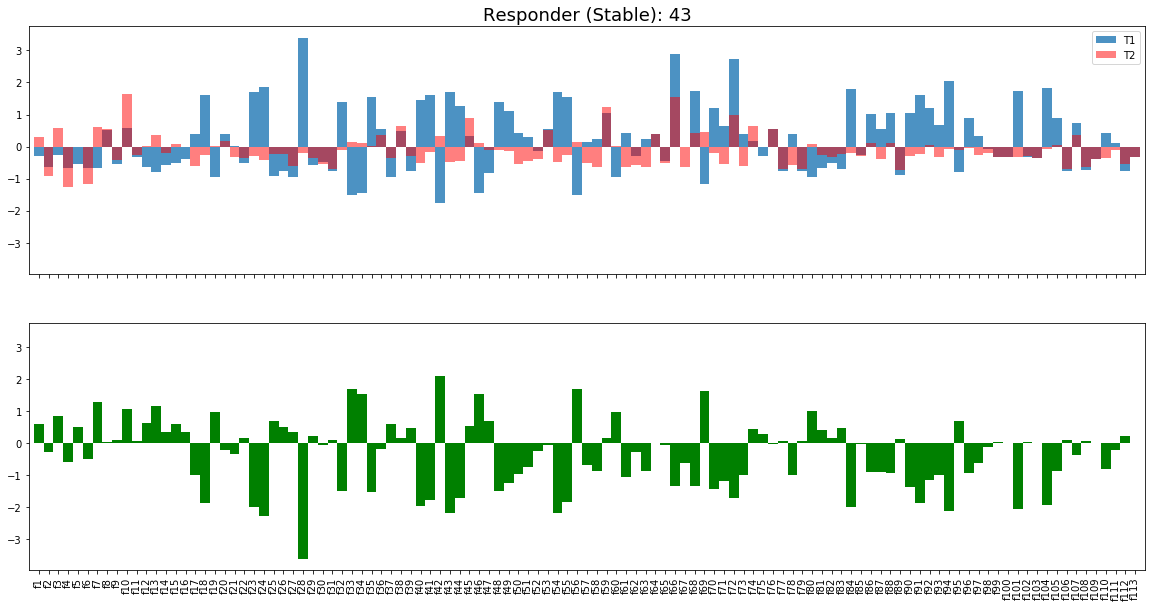

In [156]:
f, ax=plt.subplots(2,1, figsize=(20,10), sharex=True, sharey=True)
title='Responder (Stable): 43'
base=df_merged_norm.loc['43-20160705', cols_features].values.astype(np.float)
follow=df_merged_norm.loc['43-20160225', cols_features].values.astype(np.float)
diff=follow-base
index = np.arange(len(cols_number))
bar_width=1
#spacing=bar_width+0.2
ax[0].bar(index, base, bar_width, label='T1', alpha=0.8)
ax[0].bar(index, follow, bar_width, label='T2', color='r', alpha=0.5, )
ax[1].bar(index, diff, bar_width, color='g')
ax[1].set_xticks(index)
ax[1].set_xticklabels(cols_number, rotation=90)
ax[1].set_xlim(index.min()-1, index.max()+1)
ax[0].set_title(title, fontsize=18)
ax[0].legend()
plt.show()

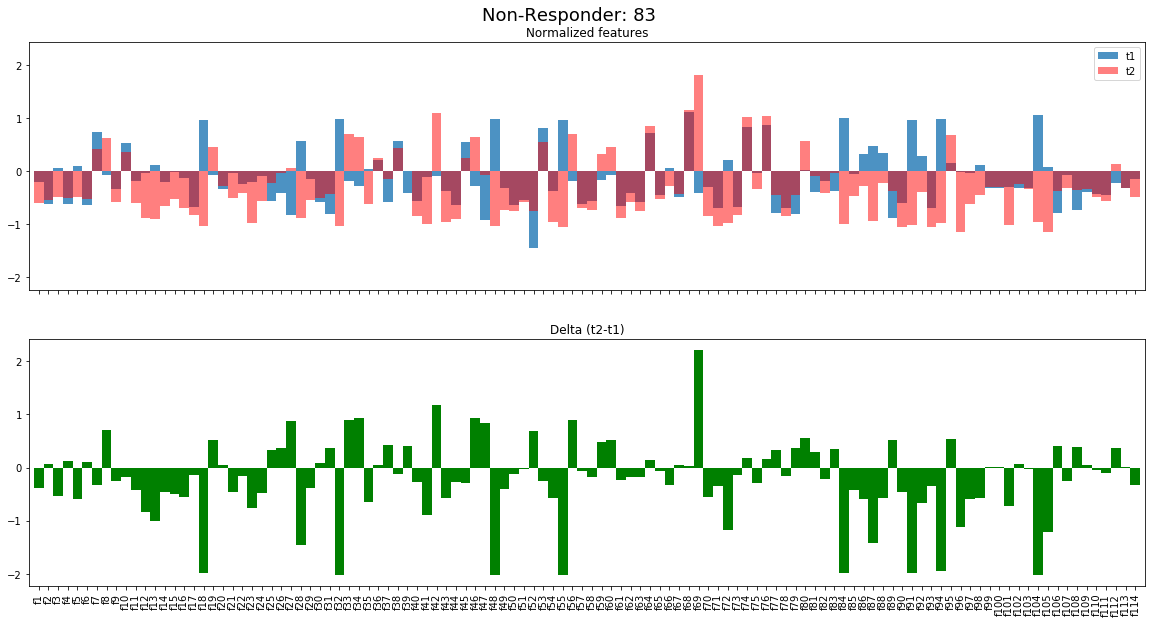

In [151]:
f, ax=plt.subplots(2,1, figsize=(20,10), sharex=True, sharey=True)
title='Non-Responder: 83'
base=df_merged_norm.loc['83-20160728', cols_features].values.astype(np.float)
follow=df_merged_norm.loc['83-20161111', cols_features].values.astype(np.float)
diff=follow-base
index = np.arange(len(cols_number))
bar_width=1
#spacing=bar_width+0.2
ax[0].bar(index, base, bar_width, label='t1', alpha=0.8)
ax[0].bar(index, follow, bar_width, label='t2', color='r', alpha=0.5, )
ax[1].bar(index, diff, bar_width, color='g')
ax[1].set_xticks(index)
ax[1].set_xticklabels(cols_number, rotation=90)
ax[1].set_xlim(index.min()-1, index.max()+1)
ax[0].set_title('Normalized features', fontsize=12)
ax[1].set_title('Delta (t2-t1)', fontsize=12)
f.suptitle(title, fontsize=18, y=.93)
ax[0].legend()
plt.show()

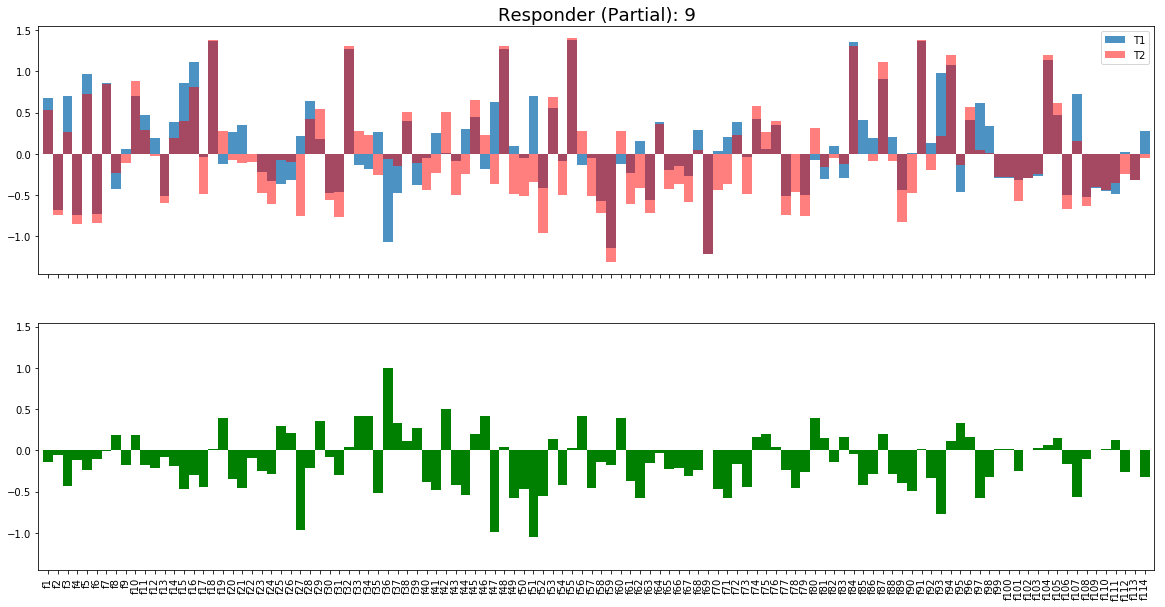

In [142]:
f, ax=plt.subplots(2,1, figsize=(20,10), sharex=True, sharey=True)
title='Responder (Partial): 9'
base=df_merged_norm.loc['9-20160920', cols_features].values.astype(np.float)
follow=df_merged_norm.loc['9-20170227', cols_features].values.astype(np.float)
diff=follow-base
index = np.arange(len(cols_number))
bar_width=1
#spacing=bar_width+0.2
ax[0].bar(index, base, bar_width, label='T1', alpha=0.8)
ax[0].bar(index, follow, bar_width, label='T2', color='r', alpha=0.5, )
ax[1].bar(index, diff, bar_width, color='g')
ax[1].set_xticks(index)
ax[1].set_xticklabels(cols_number, rotation=90)
ax[1].set_xlim(index.min()-1, index.max()+1)
ax[0].set_title(title, fontsize=18)
ax[0].legend()
plt.show()

```python
gldm 15
glcm 26
shape 16
firstorder 19
glrlm 16
glszm 16
ngtdm 5
```

In [163]:
from collections import OrderedDict
d_feature_family=OrderedDict()
for i in cols_features:
    a=i.split('_')[1]
    if a not in d_feature_family:
        d_feature_family[a]=1
    else:
        d_feature_family[a]+=1

In [164]:
d_feature_family

OrderedDict([('shape', 16),
             ('gldm', 15),
             ('glcm', 26),
             ('firstorder', 19),
             ('glrlm', 16),
             ('glszm', 16),
             ('ngtdm', 5)])

In [181]:
xtick_loc=[]
xlines_loc=[]
current=0
for v in d_feature_family.itervalues():
    mid=v/2
    xtick_loc.append(current+mid)
    current+=v
    xlines_loc.append(current-0.5)

In [182]:
xtick_loc, xlines_loc

([8, 23, 44, 66, 84, 100, 110], [15.5, 30.5, 56.5, 75.5, 91.5, 107.5, 112.5])

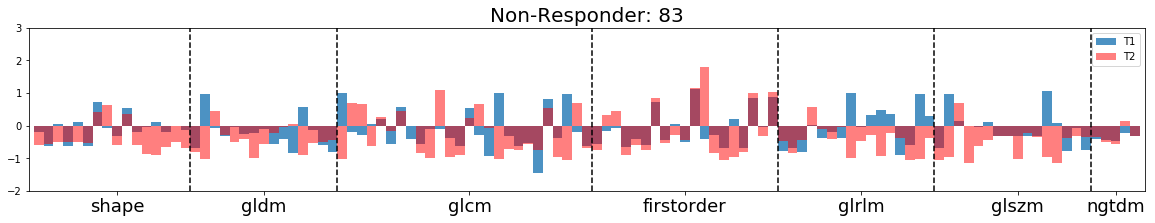

In [197]:
outdir=os.path.join('figures_20180622')
try:
    os.makedirs(outdir)
except:
    pass

subj=83
ids=df_merged_norm.query('PID==%d' % subj).sort_values(by='StudyDate').index
base=df_merged_norm.loc[ids[0], cols_features].values.astype(np.float)
follow=df_merged_norm.loc[ids[1], cols_features].values.astype(np.float)
diff=follow-base

f, ax=plt.subplots(1,1, figsize=(20,3), sharex=True)
index = np.arange(len(cols_number))
bar_width=1
#spacing=bar_width+0.2
ax.bar(index, base, bar_width, label='T1', alpha=0.8)
ax.bar(index, follow, bar_width, label='T2', color='r', alpha=0.5, )
ax.set_xticks(xtick_loc)
ax.vlines(xlines_loc[:-1], -2, 3, linestyles='--')
ax.set_xticklabels(d_feature_family.keys(), fontsize=18)
ax.set_ylim(-2, 3)
ax.set_xlim(index.min()-1, index.max()+1)
ax.set_title('Non-Responder: 83', fontsize=20)
ax.legend()
f.savefig(os.path.join(outdir,'feature_barplots_83_nonresponder.png'), dpt=150, bbox_inches='tight')

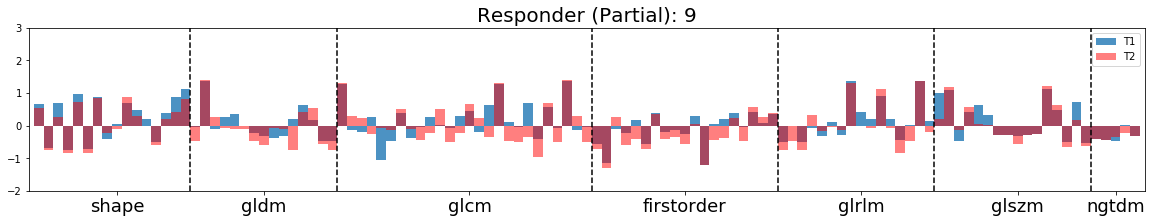

In [195]:
outdir=os.path.join('figures_20180622')
try:
    os.makedirs(outdir)
except:
    pass

subj=9
ids=df_merged_norm.query('PID==%d' % subj).sort_values(by='StudyDate').index
base=df_merged_norm.loc[ids[0], cols_features].values.astype(np.float)
follow=df_merged_norm.loc[ids[1], cols_features].values.astype(np.float)
diff=follow-base

f, ax=plt.subplots(1,1, figsize=(20,3), sharex=True)
index = np.arange(len(cols_number))
bar_width=1
#spacing=bar_width+0.2
ax.bar(index, base, bar_width, label='T1', alpha=0.8)
ax.bar(index, follow, bar_width, label='T2', color='r', alpha=0.5, )
ax.set_xticks(xtick_loc)
ax.vlines(xlines_loc[:-1], -2, 3, linestyles='--')
ax.set_xticklabels(d_feature_family.keys(), fontsize=18)
ax.set_ylim(-2, 3)
ax.set_xlim(index.min()-1, index.max()+1)
ax.set_title('Responder (Partial): 9', fontsize=20)
ax.legend()
f.savefig(os.path.join(outdir,'feature_barplots_9_repsponder.png'), dpt=150, bbox_inches='tight')

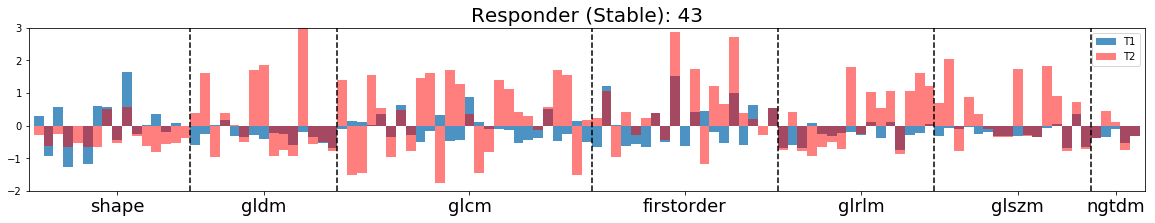

In [196]:
outdir=os.path.join('figures_20180622')
try:
    os.makedirs(outdir)
except:
    pass

subj=43
ids=df_merged_norm.query('PID==%d' % subj).sort_values(by='StudyDate').index
base=df_merged_norm.loc[ids[0], cols_features].values.astype(np.float)
follow=df_merged_norm.loc[ids[1], cols_features].values.astype(np.float)
diff=follow-base

f, ax=plt.subplots(1,1, figsize=(20,3), sharex=True)
index = np.arange(len(cols_number))
bar_width=1
#spacing=bar_width+0.2
ax.bar(index, base, bar_width, label='T1', alpha=0.8)
ax.bar(index, follow, bar_width, label='T2', color='r', alpha=0.5, )
ax.set_xticks(xtick_loc)
ax.vlines(xlines_loc[:-1], -2, 3, linestyles='--')
ax.set_xticklabels(d_feature_family.keys(), fontsize=18)
ax.set_ylim(-2, 3)
ax.set_xlim(index.min()-1, index.max()+1)
ax.set_title('Responder (Stable): 43', fontsize=20)
ax.legend()
f.savefig(os.path.join(outdir,'feature_barplots_43_repsponder.png'), dpt=150, bbox_inches='tight')

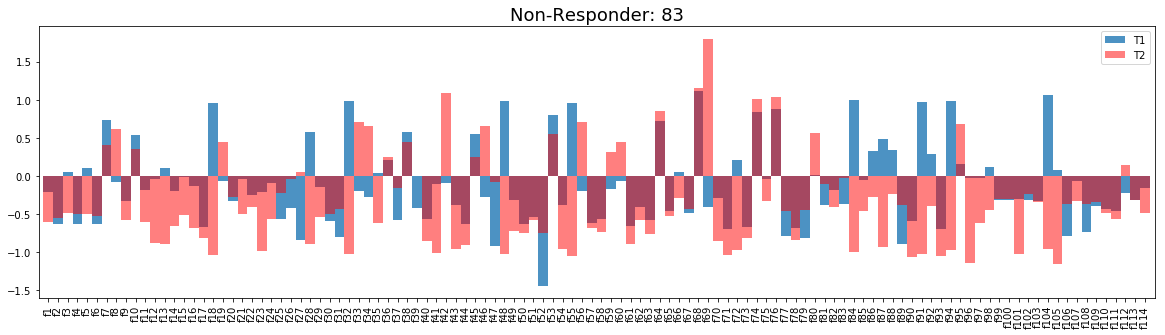

In [132]:
f, ax=plt.subplots(1,1, figsize=(20,5), sharex=True)
index = np.arange(len(cols_number))
bar_width=1
#spacing=bar_width+0.2
ax.bar(index, df_merged_norm.loc['83-20160728', cols_features].values.astype(np.float), bar_width,
       label='T1', alpha=0.8)
ax.bar(index, df_merged_norm.loc['83-20161111', cols_features].values.astype(np.float), bar_width,
       label='T2', color='r', alpha=0.5, )
ax.set_xticks(index)
ax.set_xticklabels(cols_number, rotation=90)
ax.set_xlim(index.min()-1, index.max()+1)
ax.set_title('Non-Responder: 83', fontsize=18)
ax.legend()
plt.show()

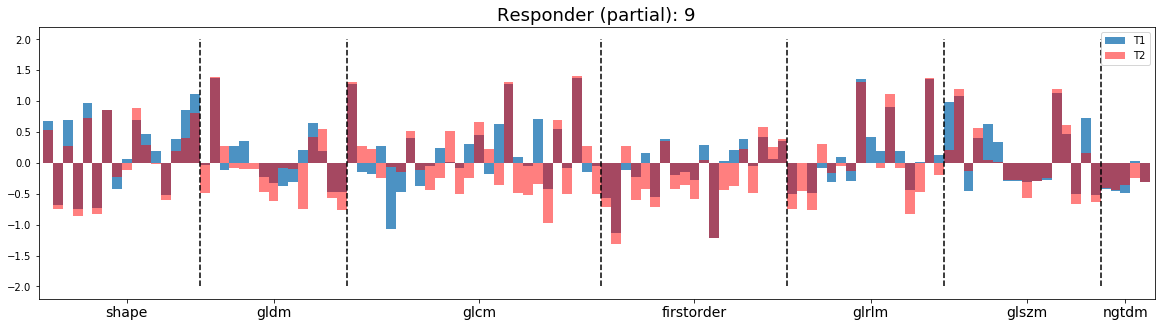

In [186]:
f, ax=plt.subplots(1,1, figsize=(20,5), sharex=True)
index = np.arange(len(cols_number))
bar_width=1
#spacing=bar_width+0.2
ax.bar(index, df_merged_norm.loc['9-20160920', cols_features].values.astype(np.float), bar_width,
       label='T1', alpha=0.8)
ax.bar(index, df_merged_norm.loc['9-20170227', cols_features].values.astype(np.float), bar_width,
       label='T2', color='r', alpha=0.5, )
ax.set_xticks(xtick_loc)
ax.vlines(xlines_loc[:-1], -2, 2, linestyles='--')
ax.set_xticklabels(d_feature_family.keys(), fontsize=14)
ax.set_xlim(index.min()-1, index.max()+1)
ax.set_title('Responder (partial): 9', fontsize=18)
ax.legend()
plt.show()

In [217]:
d_feature={}
for feature in cols_features:
    key=feature.split('_')[1]
    #value=feature.split('_')[-1]
    if key in d_feature:
        d_feature[key].append(feature)
    else:
        d_feature[key]=[feature]

In [218]:
d_feature

{'firstorder': ['original_firstorder_InterquartileRange',
  'original_firstorder_Skewness',
  'original_firstorder_Uniformity',
  'original_firstorder_MeanAbsoluteDeviation',
  'original_firstorder_Energy',
  'original_firstorder_RobustMeanAbsoluteDeviation',
  'original_firstorder_Median',
  'original_firstorder_TotalEnergy',
  'original_firstorder_Maximum',
  'original_firstorder_RootMeanSquared',
  'original_firstorder_90Percentile',
  'original_firstorder_Minimum',
  'original_firstorder_Entropy',
  'original_firstorder_StandardDeviation',
  'original_firstorder_Range',
  'original_firstorder_Variance',
  'original_firstorder_10Percentile',
  'original_firstorder_Kurtosis',
  'original_firstorder_Mean'],
 'glcm': ['original_glcm_JointAverage',
  'original_glcm_Homogeneity1',
  'original_glcm_Homogeneity2',
  'original_glcm_JointEntropy',
  'original_glcm_ClusterShade',
  'original_glcm_MaximumProbability',
  'original_glcm_Idmn',
  'original_glcm_JointEnergy',
  'original_glcm_Cont

In [262]:
d_feature['firstorder']

['original_firstorder_InterquartileRange',
 'original_firstorder_Skewness',
 'original_firstorder_Uniformity',
 'original_firstorder_MeanAbsoluteDeviation',
 'original_firstorder_Energy',
 'original_firstorder_RobustMeanAbsoluteDeviation',
 'original_firstorder_Median',
 'original_firstorder_TotalEnergy',
 'original_firstorder_Maximum',
 'original_firstorder_RootMeanSquared',
 'original_firstorder_90Percentile',
 'original_firstorder_Minimum',
 'original_firstorder_Entropy',
 'original_firstorder_StandardDeviation',
 'original_firstorder_Range',
 'original_firstorder_Variance',
 'original_firstorder_10Percentile',
 'original_firstorder_Kurtosis',
 'original_firstorder_Mean']

In [212]:
df_melt.Feature.unique()

array(['original_ngtdm_Contrast'], dtype=object)

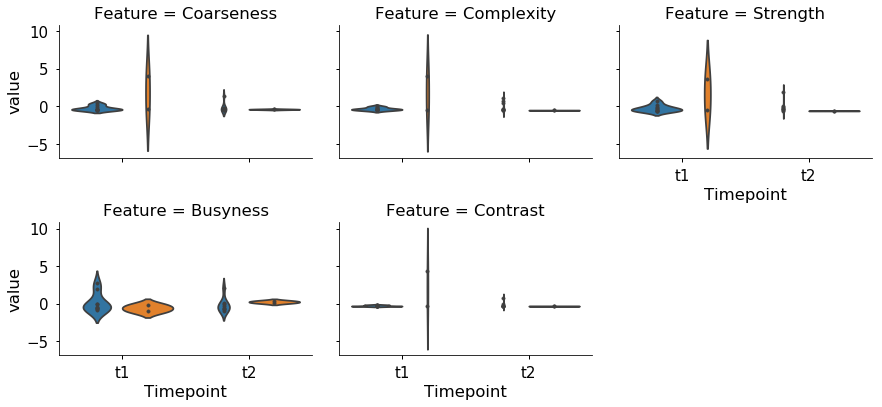

In [260]:
with sns.plotting_context("notebook", font_scale=1.5):
    g=sns.factorplot(hue='ResponseGroup', y='value', x='Timepoint', col='Feature', col_wrap=3, data=df_melt, 
                     kind='violin', inner='point', legend=False, size=3, aspect=1.4)
    #g.set_xticklabels(['Responders', 'Non\nResponders'])

In [258]:
outdir=os.path.join('figures_20180622', 'violinplots_norm')
try:
    os.makedirs(outdir)
except:
    pass

with sns.plotting_context("notebook", font_scale=1.5):
    for key, features in d_feature.iteritems():
        #print key, features
        df_melt=pd.melt(df_merged_norm, id_vars=['PID', 'Timepoint', 'ResponseGroup'], value_vars=features, var_name='Feature')
        features_short=[i.split('_')[-1] for i in features]
        df_melt['Feature'].replace(to_replace=features, value=features_short, inplace=True)
        df_melt['Timepoint'].replace(to_replace=['T1', 'T2'], value=['t1', 't2'], inplace=True)
        g=sns.factorplot(x='ResponseGroup', y='value', hue='Timepoint', col='Feature', col_wrap=5, data=df_melt, 
                         hue_order=['t1', 't2'], kind='violin', inner='point', size=3, aspect=1.4)
        g.set_titles("{col_name}").set_xticklabels(['Responders', 'Non\nResponders'])
        g.fig.savefig(os.path.join(outdir, 'violinplot_%s_by_groups.png'%key), dpi=150)
        plt.close('all')

In [261]:
outdir=os.path.join('figures_20180622', 'violinplots_norm')
try:
    os.makedirs(outdir)
except:
    pass

with sns.plotting_context("notebook", font_scale=1.5):
    for key, features in d_feature.iteritems():
        #print key, features
        df_melt=pd.melt(df_merged_norm, id_vars=['PID', 'Timepoint', 'ResponseGroup'], value_vars=features, var_name='Feature')
        features_short=[i.split('_')[-1] for i in features]
        df_melt['Feature'].replace(to_replace=features, value=features_short, inplace=True)
        df_melt['Timepoint'].replace(to_replace=['T1', 'T2'], value=['t1', 't2'], inplace=True)
        g=sns.factorplot(hue='ResponseGroup', y='value', x='Timepoint', col='Feature', col_wrap=5, data=df_melt, 
                         kind='violin', inner='point', size=3, aspect=1.4)
        g.set_titles("{col_name}") #.set_xticklabels(['Responders', 'Non\nResponders'])
        g.fig.savefig(os.path.join(outdir, 'violinplot_%s_by_groups_2.png'%key), dpi=150)
        plt.close('all')

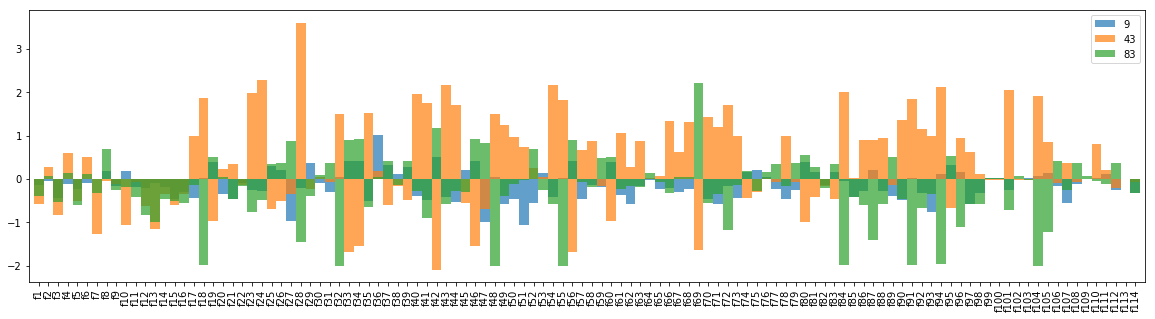

In [146]:
f, ax=plt.subplots(1,1, figsize=(20,5), sharex=True)
index = np.arange(len(cols_number))
bar_width=1
subj_list=[9, 43, 83]
for i, subj in enumerate(subj_list):
    ids=df_merged_norm.query('PID==%d' % subj).sort_values(by='StudyDate').index
    base=df_merged_norm.loc[ids[0], cols_features].values.astype(np.float)
    follow=df_merged_norm.loc[ids[1], cols_features].values.astype(np.float)
    diff=follow-base
    ax.bar(index, diff, bar_width, label=subj, alpha=0.7)
ax.set_xticks(index)
ax.set_xticklabels(cols_number, rotation=90)
ax.set_xlim(index.min()-1, index.max()+1)
#ax.set_title('Responder (partial): 9', fontsize=18)
ax.legend()
plt.show()

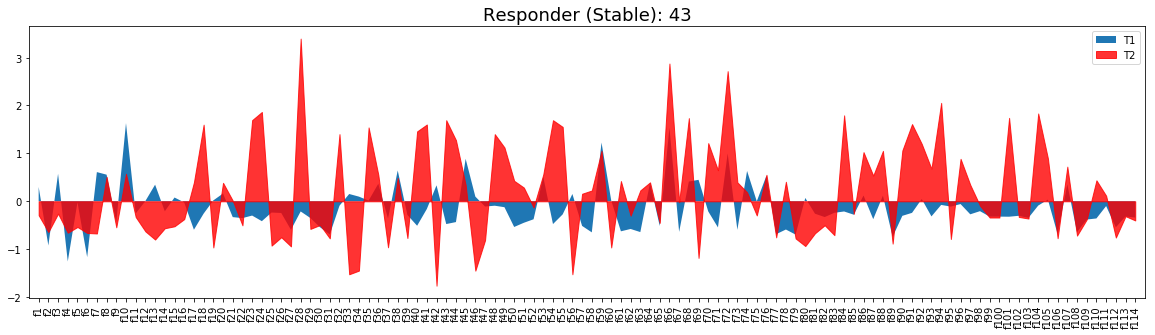

In [121]:
f, ax=plt.subplots(1,1, figsize=(20,5), sharex=True)
index = np.arange(len(cols_number), dtype=np.float)
bar_width=0.6
#spacing=bar_width+0.2
ax.fill_between(index, 0, df_merged_norm.loc['43-20160225', cols_features].values.astype(np.float),
                label='T1')
ax.fill_between(index, 0, df_merged_norm.loc['43-20160705', cols_features].values.astype(np.float), 
                label='T2', color='r', alpha=0.8, )
ax.set_xticks(index)
ax.set_xticklabels(cols_number, rotation=90)
ax.set_xlim(index.min()-1, index.max()+1)
ax.set_title('Responder (Stable): 43', fontsize=18)
ax.legend()
plt.show()

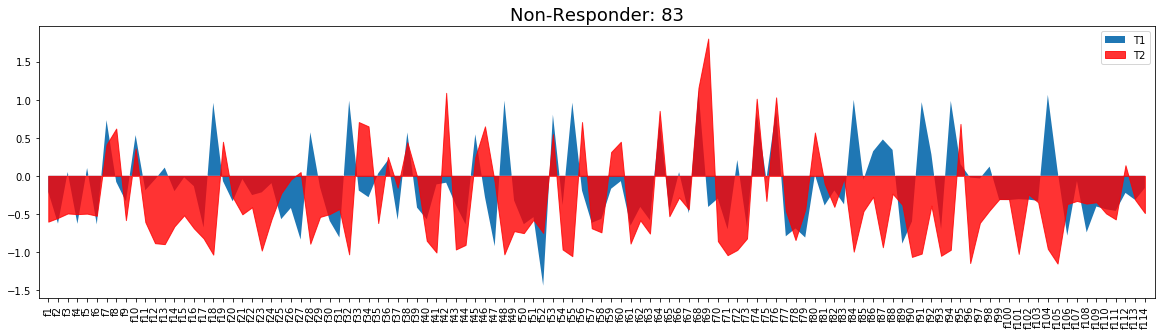

In [123]:
f, ax=plt.subplots(1,1, figsize=(20,5), sharex=True)
index = np.arange(len(cols_number), dtype=np.float)
bar_width=0.6
#spacing=bar_width+0.2
ax.fill_between(index, 0, df_merged_norm.loc['83-20160728', cols_features].values.astype(np.float),
                label='T1')
ax.fill_between(index, 0, df_merged_norm.loc['83-20161111', cols_features].values.astype(np.float), 
                label='T2', color='r', alpha=0.8, )
ax.set_xticks(index)
ax.set_xticklabels(cols_number, rotation=90)
ax.set_xlim(index.min()-1, index.max()+1)
ax.set_title('Non-Responder: 83', fontsize=18)
ax.legend()
plt.show()

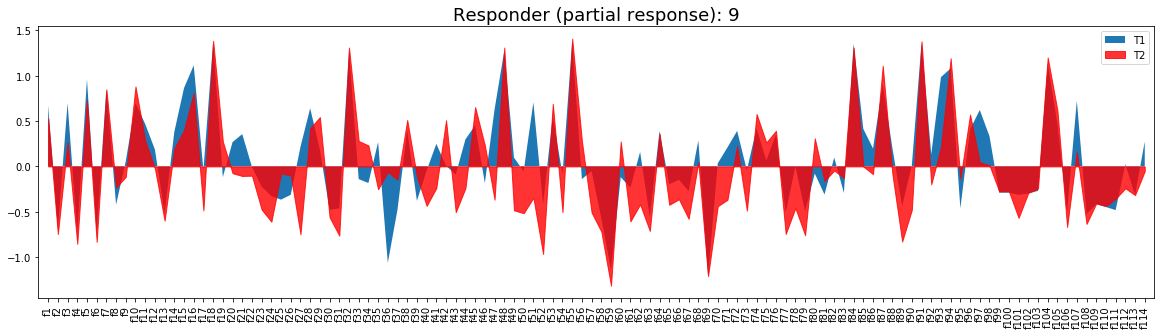

In [120]:
f, ax=plt.subplots(1,1, figsize=(20,5), sharex=True)
index = np.arange(len(cols_number), dtype=np.float)
bar_width=0.6
#spacing=bar_width+0.2
ax.fill_between(index, 0, df_merged_norm.loc['9-20160920', cols_features].values.astype(np.float), 
                label='T1')
ax.fill_between(index, 0, df_merged_norm.loc['9-20170227', cols_features].values.astype(np.float), 
                color='r', alpha=0.8, label='T2')
ax.set_xticks(index)
ax.set_xticklabels(cols_number, rotation=90)
ax.set_xlim(index.min()-1, index.max()+1)
ax.set_title('Responder (partial response): 9', fontsize=18)
ax.legend()
plt.show()